In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scienceplots
import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
import nanonets_utils

cmeter      = 1/2.54
single_col  = 8.6
gates       = ['AND','OR','XOR','NAND','NOR','XNOR']

In [271]:
df = pd.DataFrame()

for i in range(10):

    df = pd.concat([df, pd.read_csv(f"/home/jonas/phd/NanoNets/scripts/const_voltages/boolean_logic_experiment_comparsion/data/Nx=10_Ny=10_Nz=1_Ne=8_{i}.csv")], ignore_index=True)

df.to_csv(f"/home/jonas/phd/NanoNets/scripts/const_voltages/boolean_logic_experiment_comparsion/data/Nx=10_Ny=10_Nz=1_Ne=8.csv", index=0)

In [272]:
df1, df2    = nanonets_utils.get_boolean_data(folder="/home/jonas/phd/NanoNets/scripts/const_voltages/boolean_logic_experiment_comparsion/data/", 
                                              N=10, N_e=8, disordered=False, i1_col=0, i2_col=1, on_state=[0.1])

In [273]:
# df1, df2    = nanonets_utils.get_boolean_data("/home/jonas/phd/data/system_size_scale/", 7, 8)
# df1, df2    = nanonets_utils.get_boolean_data(folder="/home/jonas/phd/NanoNets/scripts/const_voltages/boolean_logic_experiment_comparsion/data/", 
#                                               N=100, N_e=8, disordered=True, i1_col=0, i2_col=1, on_state=[0.1])
fitness     = nanonets_utils.fitness(df1, 5, delta=0, on_state=0.1)

In [183]:
def u_f(vals, errors):

    min_val = np.min(vals)
    max_val = np.max(vals)
    u_min   = errors[np.argmin(vals)]
    u_max   = errors[np.argmax(vals)]

    a       = (errors/(max_val-min_val))**2
    b       = (u_max*(vals - min_val)/(max_val-min_val)**2)**2
    c       = (u_min*(vals - max_val)/(max_val - min_val)**2)**2

    return np.sqrt(a + b + c)

In [274]:
def return_fitness_at(fitness, F_th):

    high_F_index    = []
    high_F_values   = []

    for gate in gates:

        high_F_index.append(fitness.loc[fitness[f'{gate} Fitness'] > F_th, :].sort_values(by=f'{gate} Fitness', ascending=True).reset_index(drop=True).loc[:10,['C1','C2','C3','C4','C5']].values)
        high_F_values.append(fitness.loc[fitness[f'{gate} Fitness'] > F_th, :].sort_values(by=f'{gate} Fitness', ascending=True).reset_index(drop=True).loc[:10,f'{gate} Fitness'].values)

    return high_F_index, high_F_values

ValueError: 'x' and 'y' must have the same size

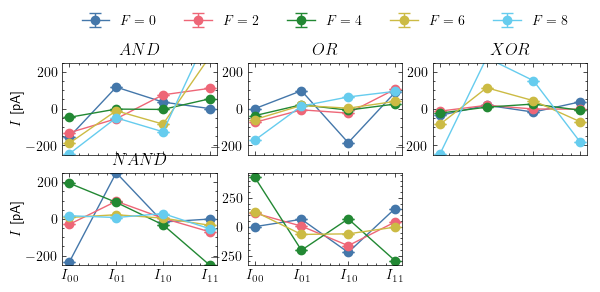

In [277]:
nth_fitness = 9
Fths        = [0,2,4,6,8]
Fths_l      = [f"$F = {val}$" for val in Fths]

with plt.style.context(["science","bright"]):

    fig = plt.figure()
    fig.set_figwidth(2*single_col*cmeter)

    for nth_gate in range(6):

        ax  = fig.add_subplot(2,3,nth_gate+1)

        for F_th in Fths:

            high_F_index, high_F_values = return_fitness_at(fitness, F_th)

            values  = df1[(df1['C1']==high_F_index[nth_gate][nth_fitness,0]) & (df1['C2']==high_F_index[nth_gate][nth_fitness,1])]['Current'].values
            erros   = df1[(df1['C1']==high_F_index[nth_gate][nth_fitness,0]) & (df1['C2']==high_F_index[nth_gate][nth_fitness,1])]['Error'].values
            values  = values - np.mean(values)

            ax.errorbar(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y=values, yerr=0, marker='o', capsize=4)

        if ((nth_gate == 0) or (nth_gate == 3)):
            ax.set_ylabel("$I$ [pA]")
        
        if (nth_gate < 3):
            ax.set_xticklabels("")
        
        if (nth_gate == 1):
            ax.legend(Fths_l, ncol=len(Fths), bbox_to_anchor=(0.5,1.45), loc='center')

        ax.yaxis.set_label_coords(-0.25, 0.5)
        ax.set_title(f"${gates[nth_gate]}$")
        ax.set_ylim(-250,250)
    
        # ax.set_title("$F_{"+f"{gates[nth_gate]}"+"} = "+f"{int(high_F_values[nth_gate][nth_fitness])}$")
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.savefig("plots/boolean_examples.pdf", bbox_inches='tight')

In [278]:
def art_f(on_m, delta):

    n_vals  = 10000
    off_min = 0 - delta
    off_max = 0 + delta
    on_min  = on_m - delta
    on_max  = on_m + delta

    df00 = pd.DataFrame(np.random.uniform(off_min,off_max,n_vals),columns=['Current'])
    df01 = pd.DataFrame(np.random.uniform(off_min,off_max,n_vals),columns=['Current'])
    df10 = pd.DataFrame(np.random.uniform(off_min,off_max,n_vals),columns=['Current'])
    df11 = pd.DataFrame(np.random.uniform(on_min,on_max,n_vals),columns=['Current'])

    res         = nanonets_utils.get_on_off_rss(df00,df01,df10,df11,'AND')
    res['F']    = (res['on']-res['off'])/res['res']
    res['I00']  = df00['Current']
    res['I01']  = df01['Current']
    res['I10']  = df10['Current']
    res['I11']  = df11['Current']
    res         = res.sort_values(by='F', ascending=False)

    return res

In [284]:
def art_f2(on_m, delta):

    n_vals  = 1000000
    off_min = 0 - delta
    off_max = 0 + delta
    on_min  = on_m - delta
    on_max  = on_m + delta

    df00 = pd.DataFrame(np.random.uniform(off_min,off_max,n_vals),columns=['Current'])
    df01 = pd.DataFrame(np.random.uniform(on_min,on_max,n_vals),columns=['Current'])
    df10 = pd.DataFrame(np.random.uniform(on_min,on_max,n_vals),columns=['Current'])
    df11 = pd.DataFrame(np.random.uniform(off_min,off_max,n_vals),columns=['Current'])

    res         = nanonets_utils.get_on_off_rss(df00,df01,df10,df11,'XOR')
    res['F']    = (res['on']-res['off'])/res['res']
    res['I00']  = df00['Current']
    res['I01']  = df01['Current']
    res['I10']  = df10['Current']
    res['I11']  = df11['Current']
    res         = res.sort_values(by='F', ascending=False)

    return res

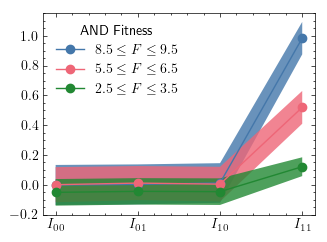

In [289]:
with plt.style.context(["science","bright"]):
        
    fig = plt.figure()
    ax  = fig.add_subplot()

    df      = art_f(1, 0.2)
    arr     = df[(df['F'] >= 8.5) & (df['F'] <= 9.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$8.5 \le F \le 9.5$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    df      = art_f(0.5, 0.2)
    arr     = df[(df['F'] >= 5.5) & (df['F'] <= 6.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$5.5 \le F \le 6.5$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    df      = art_f(0, 0.2)
    arr     = df[(df['F'] >= 2.5) & (df['F'] <= 3.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$2.5 \le F \le 3.5$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    ax.legend(title='AND Fitness')

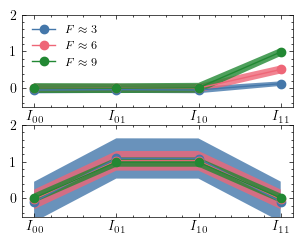

In [315]:
with plt.style.context(["science","bright"]):
        
    fig = plt.figure()
    ax  = fig.add_subplot(2,1,1)

    df      = art_f(0, 0.2)
    arr     = df[(df['F'] >= 2.5) & (df['F'] <= 3.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 3$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)    

    df      = art_f(0.5, 0.2)
    arr     = df[(df['F'] >= 5.5) & (df['F'] <= 6.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 6$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    df      = art_f(1, 0.2)
    arr     = df[(df['F'] >= 8.5) & (df['F'] <= 9.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 9$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    ax.legend(loc='upper left', ncol=1, fontsize='small')
    ax.set_ylim(-0.5,2)

    ax  = fig.add_subplot(2,1,2)

    df      = art_f2(1., 1)
    arr     = df[(df['F'] >= 2.5) & (df['F'] <= 3.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 3$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)    

    df      = art_f2(1., 0.5)
    arr     = df[(df['F'] >= 5.5) & (df['F'] <= 6.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 6$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)  

    df      = art_f2(1., 0.2)
    arr     = df[(df['F'] >= 8.5) & (df['F'] <= 9.5)].iloc[:,-4:].values
    means   = np.mean(arr,axis=0)
    stds    = np.std(arr,axis=0)

    ax.plot(['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], np.mean(arr,axis=0), 'o-', label='$F \\approx 9$')
    ax.fill_between(x=['$I_{00}$','$I_{01}$','$I_{10}$','$I_{11}$'], y1=means-stds, y2=means+stds, alpha=0.8)

    # ax.legend(title='XOR Fitness')
    ax.set_ylim(-0.5,2)
    fig.savefig("plots/boolean_fitness_quantity.pdf", bbox_inches='tight')